In [1]:
import pandas as pd
df = pd.read_csv("covid_19_clean_complete.csv")
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  14664 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


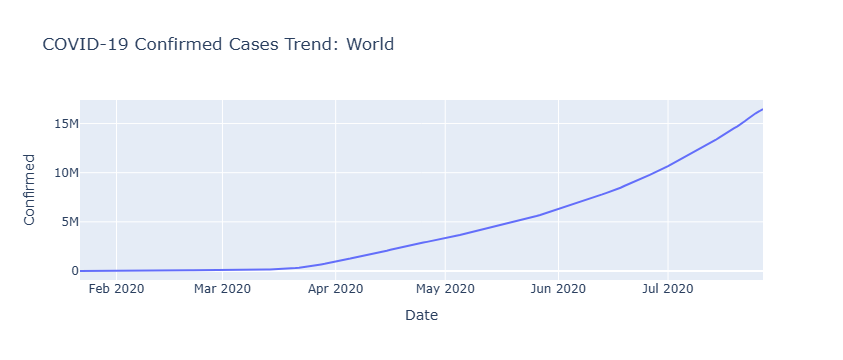

In [11]:
import plotly.express as px
def create_time_series(df, country="World"):
    if country != "World":
        df = df[df['Country/Region'] == country]
    fig = px.line(df.groupby('Date')['Confirmed'].sum().reset_index(),
                    x='Date',
                    y='Confirmed',
                    title=f'COVID-19 Confirmed Cases Trend: {country}')
    return fig
create_time_series(df)

In [12]:
import folium
def create_geo_map(df):
    latest_date = df['Date'].max()
    latest_data = df[df['Date'] == latest_date]
    
    m = folium.Map(location=[20,0], zoom_start=2)
    for _, row in latest_data.iterrows():
        folium.CircleMarker(
            location=[row['Lat'], row['Long']],
            radius=row['Confirmed']**0.2, # Scale for visibility
            color='red',
            fill=True
        ).add_to(m)
    return m
create_geo_map(df)

In [13]:
# Import necessary library
! pip install dash plotly pandas requests geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached dash-3.0.4-py3-none-any.whl.metadata (10 kB)
  Using cached retrying-1.3.4-py3-none-any.whl.metadata (6.9 kB)
Using cached dash-3.0.4-py3-none-any.whl (7.9 MB)
   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   --- ------------------------------------ 1.8/19.2 MB 9.1 MB/s eta 0:00:02
   ------- -------------------------------- 3.7/19.2 MB 9.1 MB/s eta 0:00:02
   ------------ --------------------------- 5.8/19.2 MB 9.5 MB/s eta 0:00:02
   --------------- ------------------------ 7.6/19.2 MB 9.4 MB/s eta 0:00:02
   ------------------- -------------------- 9.2/19.2 MB 8.9 MB/s eta 0:00:02
   ----------------------- ---------------- 11.3/19.2 MB 9.3 MB/s eta 0:00:01
   --------------------------- ------------ 13.1/19.2 MB 9.1 MB/s eta 0:00:01
   ------------------------------ --------- 14.7/19.2 MB 9.0 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.2 MB 9

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [14]:
!pip install dash plotly pandas requests folium

Defaulting to user installation because normal site-packages is not writeable
  Using cached folium-0.19.7-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
Using cached folium-0.19.7-py2.py3-none-any.whl (112 kB)
Using cached branca-0.8.1-py3-none-any.whl (26 kB)


In [20]:
pip install dash-core-components dash-html-components

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\Deepak\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [21]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd
import folium
from dash.dependencies import Input, Output
from io import BytesIO
import base64
from folium.plugins import MarkerCluster

C:\Users\Deepak\AppData\Local\Temp\ipykernel_25304\1646476694.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

C:\Users\Deepak\AppData\Local\Temp\ipykernel_25304\1646476694.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`



In [22]:
# Initialize Dash app
app = dash.Dash(__name__)

In [24]:
# Read COVID-19 data from CSV file
df = pd.read_csv('covid_19_clean_complete.csv')
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe
